# Step 1: Raw data import and preprocessing 

In [1]:
#import libraries
import pandas as pd #data analysis
import numpy as np #Linear algebra
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #advanced data visuzalization

In [2]:
#import raw file
raw_data=pd.read_csv('app_anon.csv.gz')

In [3]:
#get info on the file
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251202 entries, 0 to 1251201
Data columns (total 27 columns):
Appointment Date                             1251202 non-null object
Appointment Start Time                       1219179 non-null object
Appointment End Time                         1219179 non-null object
Appointments Arrived Time                    1251202 non-null object
Appointments Departure Time                  1251202 non-null object
Appointment Created By                       651769 non-null object
Billable Appointments                        1251202 non-null object
Encounter Eligibility Status                 1050392 non-null object
Encounter Type                               1251202 non-null int64
Encounter Type Description                   1251202 non-null object
Interface Visit Number                       1251202 non-null object
New Patient                                  1251202 non-null object
Patient Age as of Appointment Date (Year)    1251202 non-null

Data set appears to have few variables with missing values. Let us analyze them.

In [4]:
#calculate share of missing values for each variable
percent_missing = raw_data.isnull().sum() * 100 / len(raw_data)

#match variables to % of their missing values (calculated above)
missing_value_df = pd.DataFrame({'column_name': raw_data.columns,
                                 'percent_missing': percent_missing})

#sort variables with missing values by % of missing values in descending order
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)

#create new table only with variables, which have missing values
missing_value_df_sorted=missing_value_df[missing_value_df.percent_missing>0]

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

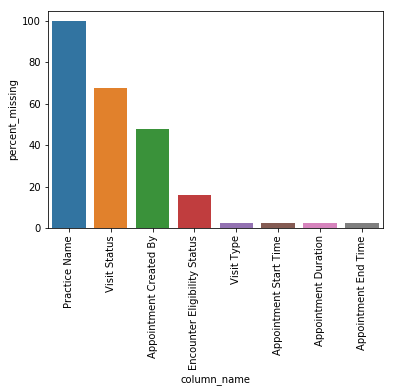

In [5]:
#show chart with % of missing values by variable
sns.barplot(x='column_name', y='percent_missing', data=missing_value_df_sorted)

#rotate x ticks for better readability
plt.xticks(rotation=90)

Data set appears to be solid with few variables having missing variables. Of those only "Visit Status" seems to be important for analysis and we will investigate it later. For now we will take a look at the data set and see if we can drop unnecessary columns.

In [6]:
#set number of visible columns to 27 (entire data set)
pd.set_option('display.max_columns', 27)

#have a look at data set
raw_data.head()

,Appointment Date,Appointment Start Time,Appointment End Time,Appointments Arrived Time,Appointments Departure Time,Appointment Created By,Billable Appointments,Encounter Eligibility Status,Encounter Type,Encounter Type Description,Interface Visit Number,New Patient,Patient Age as of Appointment Date (Year),Practice Name,Visit Status,Visit Type,Appointment Duration,Billable Visit Count,New Patients Count (by Visit),Patient Count,Visit Count,Encounter ID,Practice ID,Patient ID,Appointment Provider Name,Patient Date of Birth,Appointment Provider ID
0,2019-01-01,13:00:00,13:20:00,00:00:00,00:00:00,eabba2c63c4f8db5e7131db588ca34bf05c3b1c2,No,V,1,Office Visit,a385cfd2a287397115412cd25ab946570b38e204,No,77,NaN,Rescheduled,OV,20 minutes,0,0,1,1,061caddcab2eb4c3c2b0b0d5f533c20d19b1913c,a385cfd2a287397115412cd25ab946570b38e204,93a372044bb3f7b755aa6794ffe22c8e358c18db,17ba02b249bb4d5bd9e388d1800d76d57a10ebd3,1941-12-12,25078
1,2019-01-01,10:20:00,10:40:00,00:00:00,00:00:00,51107589d7f095cf1fa022a1c0228db56c0e7db5,No,V,1,Office Visit,a385cfd2a287397115412cd25ab946570b38e204,No,77,NaN,Cancelled,OV,20 minutes,0,0,1,1,02064cb68e8d487f3bda6ab3ef4433cde58b5cd8,a385cfd2a287397115412cd25ab946570b38e204,f73fe1e97521699f47c9dc358afcf84a64df3b19,48389b0921d32852b97546d1fb26fe887e3566c3,1941-07-07,24414
2,2019-01-01,08:00:00,17:00:00,00:00:00,00:00:00,c7086233ccb64de52cf8272fb643fda8cf0af4d8,No,V,1,Office Visit,a385cfd2a287397115412cd25ab946570b38e204,No,72,NaN,Cancelled,NV,9 hours,0,0,1,1,b8e52e8127506bcf5b736812f4c09433fc57cb4e,a385cfd2a287397115412cd25ab946570b38e204,afe8dc6b2ad0962b02ef6292f925582693598d68,29568b3bdf267d73b34d916df61489b8640572be,1946-01-27,58139
3,2019-01-01,09:30:00,10:00:00,00:00:00,00:00:00,2bf0ded51f1a5307947206c7ee2127ef418d20ae,Yes,V,1,Office Visit,a385cfd2a287397115412cd25ab946570b38e204,No,76,NaN,Confirmed,ILL,30 minutes,1,0,1,1,8af60277bcf43e0463cbe269a4d3e1689ce1fed8,a385cfd2a287397115412cd25ab946570b38e204,f17420e7f74baed97fc26791ce541e8e73cf64cf,68e51b5e1d96ba69b522a0013928f2f83761ac6c,1942-10-20,19399
4,2019-01-01,12:58:00,12:58:00,00:00:00,00:00:00,b1dd7be919eb7c54a8251fd58e11998d78c38d03,No,V,2,telephone Encounter,a385cfd2a287397115412cd25ab946570b38e204,No,78,NaN,NaN,TEL,0 days,0,0,1,1,d133ab6b98f469da83b4acb544a332fb5af0cb7f,a385cfd2a287397115412cd25ab946570b38e204,4e280df58bbf0d2ac8c060476dea96124f0aefd3,d761e7eaa9d3c1529e60d4d17b161c2dc781bc2f,1940-01-13,53745


We immediately see that there are a couple of columns with obscure values. Those were most probably modified for privacy reasons as they include names and IDs. Therefore we will drop them.

In [7]:
#create data checkpoint
df1=raw_data.copy()

#drop columns with obscure values
df1.drop(['Appointment Created By', 
          'Interface Visit Number',
          'Practice Name', 
          'Encounter ID', 
          'Practice ID', 
          'Patient ID', 
          'Appointment Provider Name'], 1, inplace=True)

In [8]:
#have a look at updated dataframe
df1.head()

,Appointment Date,Appointment Start Time,Appointment End Time,Appointments Arrived Time,Appointments Departure Time,Billable Appointments,Encounter Eligibility Status,Encounter Type,Encounter Type Description,New Patient,Patient Age as of Appointment Date (Year),Visit Status,Visit Type,Appointment Duration,Billable Visit Count,New Patients Count (by Visit),Patient Count,Visit Count,Patient Date of Birth,Appointment Provider ID
0,2019-01-01,13:00:00,13:20:00,00:00:00,00:00:00,No,V,1,Office Visit,No,77,Rescheduled,OV,20 minutes,0,0,1,1,1941-12-12,25078
1,2019-01-01,10:20:00,10:40:00,00:00:00,00:00:00,No,V,1,Office Visit,No,77,Cancelled,OV,20 minutes,0,0,1,1,1941-07-07,24414
2,2019-01-01,08:00:00,17:00:00,00:00:00,00:00:00,No,V,1,Office Visit,No,72,Cancelled,NV,9 hours,0,0,1,1,1946-01-27,58139
3,2019-01-01,09:30:00,10:00:00,00:00:00,00:00:00,Yes,V,1,Office Visit,No,76,Confirmed,ILL,30 minutes,1,0,1,1,1942-10-20,19399
4,2019-01-01,12:58:00,12:58:00,00:00:00,00:00:00,No,V,2,telephone Encounter,No,78,NaN,TEL,0 days,0,0,1,1,1940-01-13,53745


We can bring few additional changes to the data set. 1) Apply binary encoding to "Billable Appointments", "New Patient" (we actually obsserve variables "Billable Visit Count" and "New Patients Count" that likely duplicate those before. 2) Drop "Patient Date of Birth" as we have patient age provided.

In [9]:
#as "Billable Appointments", "New Patient"are of type 'object' we need to transofrm them to type 'string' first
df1['Billable Appointments']=df1['Billable Appointments'].astype('str')
df1['New Patient']=df1['New Patient'].astype('str')

#apply binary encoding to 'Billable Appointments'
df1['Billable Appointments']=df1['Billable Appointments'].map({'No':0, 'Yes':1})

#apply binary encoding to 'New Patient'
df1['New Patient']=df1['New Patient'].map({'No':0, 'Yes':1})

In [10]:
#check number of entries where 'Billable Appointments' != 'Billable Visit Count'; 'New Patient'!="New Patients Count (by Visit)"
print((df1[df1['Billable Appointments']!=df1['Billable Visit Count']])['Billable Appointments'].count(),
      (df1[df1['New Patient']!=df1["New Patients Count (by Visit)"]])['New Patient'].count())

0 0


We have learned that 'Billable Appointments' = 'Billable Visit Count'; 'New Patient' = "New Patients Count (by Visit)" and will drop 'Billable Visit Count', 'New Patients Count (by Visit)' as well as 'Patient Date of Birth'.

In [11]:
#create data checkpoint
df2=df1.copy()

#drop above mentioned columns
df2.drop(['Billable Visit Count', 
          "New Patients Count (by Visit)",
          'Patient Date of Birth'], 1, inplace=True)

We have cleaned up our data by deleting obscure and duplicate values. Now we will have a look at other variables and decide on how to use them best. As we will use pivot tables, it is worth adding 'index' column for easier data manipulation.

In [12]:
#add index to dataframe
df2 = df2.reset_index()

#have a look at updated dataframe
df2.head()

,index,Appointment Date,Appointment Start Time,Appointment End Time,Appointments Arrived Time,Appointments Departure Time,Billable Appointments,Encounter Eligibility Status,Encounter Type,Encounter Type Description,New Patient,Patient Age as of Appointment Date (Year),Visit Status,Visit Type,Appointment Duration,Patient Count,Visit Count,Appointment Provider ID
0,0,2019-01-01,13:00:00,13:20:00,00:00:00,00:00:00,0,V,1,Office Visit,0,77,Rescheduled,OV,20 minutes,1,1,25078
1,1,2019-01-01,10:20:00,10:40:00,00:00:00,00:00:00,0,V,1,Office Visit,0,77,Cancelled,OV,20 minutes,1,1,24414
2,2,2019-01-01,08:00:00,17:00:00,00:00:00,00:00:00,0,V,1,Office Visit,0,72,Cancelled,NV,9 hours,1,1,58139
3,3,2019-01-01,09:30:00,10:00:00,00:00:00,00:00:00,1,V,1,Office Visit,0,76,Confirmed,ILL,30 minutes,1,1,19399
4,4,2019-01-01,12:58:00,12:58:00,00:00:00,00:00:00,0,V,2,telephone Encounter,0,78,NaN,TEL,0 days,1,1,53745


There are three more variables that are either marked as 'technical' or 'n/a' in the description. Those include 'Encounter Eligibility Status', 'Patient Count', 'Visit Count'. We will investigate them.

In [13]:
#investigate "Encounter Eligibility Status" variable
pd.pivot_table(df2, index='Encounter Eligibility Status', values='index', aggfunc='count')

,index
Encounter Eligibility Status,
V,1050392


In [14]:
#investigate "Patient Count" variable
pd.pivot_table(df2, index='Patient Count', values='index', aggfunc='count')

,index
Patient Count,
1,1251202


In [15]:
#investigate "Visit Count" variable
pd.pivot_table(df2, index='Visit Count', values='index', aggfunc='count')

,index
Visit Count,
1,1251202


We observe that all that 3 variables have only one value; thus we will drop them.

In [16]:
#drop 'Encounter Eligibility Status', 'Patient Count', 'Visit Count'
df2.drop(['Encounter Eligibility Status', 
          'Patient Count',
          'Visit Count'], 1, inplace=True)

In [17]:
#have a look at updated dataframe
df2.head()

,index,Appointment Date,Appointment Start Time,Appointment End Time,Appointments Arrived Time,Appointments Departure Time,Billable Appointments,Encounter Type,Encounter Type Description,New Patient,Patient Age as of Appointment Date (Year),Visit Status,Visit Type,Appointment Duration,Appointment Provider ID
0,0,2019-01-01,13:00:00,13:20:00,00:00:00,00:00:00,0,1,Office Visit,0,77,Rescheduled,OV,20 minutes,25078
1,1,2019-01-01,10:20:00,10:40:00,00:00:00,00:00:00,0,1,Office Visit,0,77,Cancelled,OV,20 minutes,24414
2,2,2019-01-01,08:00:00,17:00:00,00:00:00,00:00:00,0,1,Office Visit,0,72,Cancelled,NV,9 hours,58139
3,3,2019-01-01,09:30:00,10:00:00,00:00:00,00:00:00,1,1,Office Visit,0,76,Confirmed,ILL,30 minutes,19399
4,4,2019-01-01,12:58:00,12:58:00,00:00:00,00:00:00,0,2,telephone Encounter,0,78,NaN,TEL,0 days,53745


We have brushed up data by deleting obscure, duplicate and useless variables and are now ready to investigate first question of the task: "What is going on with appointments now? Is it good or bad?"

# Step 2: Investigating appointments situation

We can get two important pieces of data regarding appointements from the dataset: 1) real vs scheduled appointment time 2) appointment status. That is there could be three potential problems: 1) patients can be late 2) it takes more time than scheduled to see on-time patients 3) patients cancel appointments. We will investigate all three potential problems.

# Hypothesis 1: Patients come late

Late patients will be those, whose 'Appointments Arrived Time'>'Appointment Start Time'. To count number of those, we will first need to change time variables from type object to type datetime.

In [18]:
#create checkpoint
df3=df2.copy()

#import datetime
import datetime as dt

#change time variables to type datetime
df3['Appointments Arrived Time']=pd.to_datetime(df3['Appointments Arrived Time'])
df3['Appointment Start Time']=pd.to_datetime(df3['Appointment Start Time'])

Before we proceed, we need to take into account that not all encounter types are office visits. We will therefore calculate share of late patients as that of office visits, not all encounters.

In [19]:
#create table with number of visits by encounter type
encounter=pd.pivot_table(df3, index='Encounter Type Description', values='index', aggfunc='count').reset_index()

#rename index column for correct share calculation
encounter.rename(columns={'index':'total'}, inplace=True)

#add share of each encounter type
encounter['% share']=encounter.total/len(df3.index)*100

#sort by encounter type in descending order
encounter.sort_values('total', inplace=True, ascending=False)

encounter

,Encounter Type Description,total,% share
2,Office Visit,405497,32.408596
6,telephone Encounter,377846,30.198641
0,Labs,354361,28.321646
5,ePrescription,80799,6.457710
3,Only Claim,32023,2.559379
4,Web Encounter,625,0.049952
1,Not Defined,51,0.004076


In [20]:
df3.head()

,index,Appointment Date,Appointment Start Time,Appointment End Time,Appointments Arrived Time,Appointments Departure Time,Billable Appointments,Encounter Type,Encounter Type Description,New Patient,Patient Age as of Appointment Date (Year),Visit Status,Visit Type,Appointment Duration,Appointment Provider ID
0,0,2019-01-01,2019-07-30 13:00:00,13:20:00,2019-07-30,00:00:00,0,1,Office Visit,0,77,Rescheduled,OV,20 minutes,25078
1,1,2019-01-01,2019-07-30 10:20:00,10:40:00,2019-07-30,00:00:00,0,1,Office Visit,0,77,Cancelled,OV,20 minutes,24414
2,2,2019-01-01,2019-07-30 08:00:00,17:00:00,2019-07-30,00:00:00,0,1,Office Visit,0,72,Cancelled,NV,9 hours,58139
3,3,2019-01-01,2019-07-30 09:30:00,10:00:00,2019-07-30,00:00:00,1,1,Office Visit,0,76,Confirmed,ILL,30 minutes,19399
4,4,2019-01-01,2019-07-30 12:58:00,12:58:00,2019-07-30,00:00:00,0,2,telephone Encounter,0,78,NaN,TEL,0 days,53745


We see that when we changed 'Appointment Start Time' and 'Appointments Arrived Time' variables to type datetime, it took the current date instead of that in 'Appointment Date'. Yet, that does not prevent us from separatig late entries.To be fair we will only account for late patients, who were not only late, but also left after scheduled appointment end time.

In [21]:
#change 'Appointments Departure Time' to type datetime
df3['Appointments Departure Time']=pd.to_datetime(df3['Appointments Departure Time'])

#change 'Appointment End Time' to type datetime
df3['Appointment End Time']=pd.to_datetime(df3['Appointment End Time'])

#calculate appointment duration (we update it as formerly it was of type object)
ap_dur=df3['Appointment End Time'] - df3['Appointment Start Time']

#update variable 'Appointment Duration'
df3['Appointment Duration']=ap_dur/np.timedelta64(1,'m')

#create variable 'is_late'
df3["is_late"]=np.where(df3['Appointments Arrived Time']>df3['Appointment Start Time'],1,0) 

#create filter for office visit only entries
filter_office=df3[df3['Encounter Type Description']=='Office Visit']

#create filter for come late-leave late patients
filter_come_leave_late=df3[(df3.is_late==1)&(df3['Appointments Departure Time']>df3['Appointment End Time'])]

In [22]:
#compare number of late patients to those who also left late
print('Total number of late patients is', len(df3[df3.is_late==1]),
                                            'and of those left late', len(filter_come_leave_late), 'or',
                                            round(len(filter_come_leave_late)/len(df3[df3.is_late==1])*100), '%')


Total number of late patients is 69624 and of those left late 60253 or 87 %


In [23]:
#compare number of come-leave late patients to total office visits
print('Share of come-leave late patients to total office visits:',
     round(len(filter_come_leave_late)/len(filter_office)*100),'%')

Share of come-leave late patients to total office visits: 15 %


We have figured out that 15% of office visits are patients who come late and (probably as a result) leave late. Leave-late patients are 87% of come-late patients.

# Hypothesis 2: it takes more time than scheduled to see on-time patients

In [24]:
#create checkpoint
df4=df3.copy()

#create filter for long visits
filter_long_visit=df4[df4['Appointment Duration']<((df4['Appointments Departure Time']-df4['Appointment Start Time'])/np.timedelta64(1,'m'))]

#update filter for long visits with patients who were on time
filter_long_visit=filter_long_visit[filter_long_visit.is_late==0]

In [25]:
#compare number of long visits to total on-time office visits
print('Share of long visits to total on-time office visits:',
     round(len(filter_long_visit)/len(filter_office[filter_office.is_late==0])*100),'%')

Share of long visits to total on-time office visits: 38 %


As it turns out, almost 40% of on-time patients require more time for a visit than was initially planned.

# Hypothesis 3: patients cancel appointments

As we are working with office-onluy appointments, we will disregard other types of encounter. However, we will first check, that "Visit Status" is only available for office visits and there are no issues with other types of encounters. 

In [26]:
#check number of "Visit Status" entries provided for each encounter type
pd.pivot_table(df4, index='Encounter Type Description', values='Visit Status', aggfunc='count' )

,Visit Status
Encounter Type Description,
Labs,0
Not Defined,0
Office Visit,405496
Only Claim,0
Web Encounter,0
ePrescription,0
telephone Encounter,0


In [27]:
#as we have confirmed that visit status is only available for office visits, we will continue working with office visits only
#create checkpoint
df5=filter_office

In [28]:
#create pivot with visit status for office visits
temp=pd.pivot_table(df5, index='Visit Status', values='index', aggfunc='count').reset_index()

#rename index column for correct share calculation
temp.rename(columns={'index':'total'}, inplace=True)

#sort table by number of visits for each visit status
temp.sort_values('total', inplace=True, ascending=False)

#add share of each office visit status
temp['share']=temp.total/sum(temp.total)*100

#show table
temp[temp.share>0.1]

,Visit Status,total,share
1,Check Out,299776,73.928226
15,Rescheduled,45551,11.233403
0,Cancelled,36870,9.092568
5,No-Show,13416,3.308541
20,Visit Pending,6317,1.557845
21,Voice,1326,0.327007
3,Confirmed,869,0.214305
2,Check-In,795,0.196056


We immediately observe a problem with office visits - almost a quarter of visits (23,63%) are either rescheduled or cancelled or are no-show. We have isolated three problems - late come (~15%) of visits, long visits (~40%) and no-show/cancellation (~25%). A quick google search shows that no-shows cost US hospitals around USD 200-500 per missed appointment or up to total of USD 150 billion a year. We will therefore investigate that problem.

In [29]:
#create new variable with average cancellation rate
avg_cr=sum(temp[(temp['Visit Status']=='Rescheduled')|(temp['Visit Status']=='Cancelled')|(temp['Visit Status']=='No-Show')].share)

# Step 3: Investigate problem with cancelled appointments

In [30]:
#For simplicity we will treat 'Rescheduled', 'Cancelled', 'No-show'as 'Cancelled'
df5["cancelled"]=np.where((df5['Visit Status']=='Rescheduled')|
                          (df5['Visit Status']=='Cancelled')|
                          (df5['Visit Status']=='No-Show'),1,0) 

C:\Users\v.butorin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [31]:
#we also do not need a number of variables anymore and will drop them

#create checkpoint
df6=df5.copy()

#drop redundant columns
df6.drop(['Appointment End Time', 
          'Appointments Arrived Time',
          'Appointments Departure Time',
          'Encounter Type',
          'Encounter Type Description',
          'Visit Status',
          'is_late',
          'Visit Status',], 1, inplace=True)

In [32]:
#extract year, month, day, hour to check dependency with cancellation rate
df6['Appointment Date']=pd.to_datetime(df6['Appointment Date'])

df6['year'] = df6['Appointment Date'].dt.year
df6['month'] = df6['Appointment Date'].dt.month
df6['day'] = df6['Appointment Date'].dt.weekday
df6['hour'] = df6['Appointment Start Time'].dt.hour

#drop 'Appointment Start Time' as redundant, will use 'Appointment Date' future for time series forecasting
df6.drop(['Appointment Start Time'], 1, inplace=True)

#rename columns for easier manipulation
df6.rename(columns={'Billable Appointments':'billable',
                    'New Patient': 'new_p',
                    "Patient Age as of Appointment Date (Year)": 'age',
                    'Visit Type':'type',
                    'Appointment Duration':'duration',
                    'Appointment Provider ID':'provider_id'}, inplace=True)

#change columns order
df6 = df6[['index','Appointment Date','year','month','day','hour','billable','new_p','age','type','duration','provider_id','cancelled']]

In [33]:
#check updated dataframe
df6.head()

,index,Appointment Date,year,month,day,hour,billable,new_p,age,type,duration,provider_id,cancelled
0,0,2019-01-01,2019,1,1,13,0,0,77,OV,20.0,25078,1
1,1,2019-01-01,2019,1,1,10,0,0,77,OV,20.0,24414,1
2,2,2019-01-01,2019,1,1,8,0,0,72,NV,540.0,58139,1
3,3,2019-01-01,2019,1,1,9,1,0,76,ILL,30.0,19399,0
763,763,2019-01-02,2019,1,2,13,0,0,39,CPE,40.0,28547,1


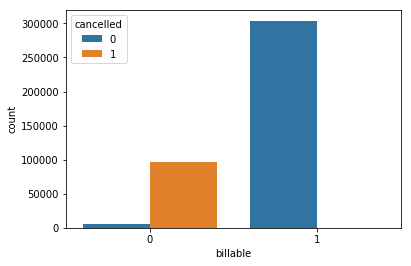

In [34]:
#check if there is connection between billable and cancellation
ax = sns.countplot(x='billable', hue='cancelled', data=df6)

In [35]:
#obvisouly if the patient does not come, he or she os not billed; drop 'billable' column
df6.drop(['billable'],1,inplace=True)

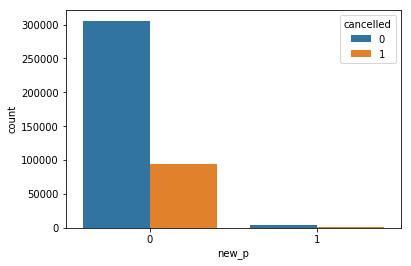

In [36]:
#check if there is connection between new_p and cancellation
ax = sns.countplot(x='new_p', hue='cancelled', data=df6)

In [37]:
#new patients contribute a very small share of office visit; we will drop the variable
df6.drop(['new_p'],1,inplace=True)

In [38]:
#break cancelled into two binary columns for easier data manipulation
df6 = pd.get_dummies(df6, columns=['cancelled'], prefix = ['cancelled'])
df6.head()

,index,Appointment Date,year,month,day,hour,age,type,duration,provider_id,cancelled_0,cancelled_1
0,0,2019-01-01,2019,1,1,13,77,OV,20.0,25078,0,1
1,1,2019-01-01,2019,1,1,10,77,OV,20.0,24414,0,1
2,2,2019-01-01,2019,1,1,8,72,NV,540.0,58139,0,1
3,3,2019-01-01,2019,1,1,9,76,ILL,30.0,19399,1,0
763,763,2019-01-02,2019,1,2,13,39,CPE,40.0,28547,0,1


In [39]:
#investigate cancellation rate by type of visit
temp=pd.pivot_table(df6, index='type', values=['cancelled_0', 'cancelled_1'], aggfunc='sum').reset_index()
temp['total_visits']=temp.cancelled_0+temp.cancelled_1
temp['share']=temp.total_visits/len(df6)*100
temp['cancelled_%']=temp.cancelled_1/temp.total_visits*100
temp=temp.sort_values('cancelled_%', ascending=False)

#we will set minimum number of visits to 4000 or ~1% of total office visits to filter data noise
temp[(temp['cancelled_%']>avg_cr)&(temp.total_visits>4000)]

,type,cancelled_0,cancelled_1,total_visits,share,cancelled_%
2,CPE,7404.0,3411.0,10815.0,2.667097,31.539528
28,SP-FU,4961.0,2120.0,7081.0,1.746252,29.939274
23,OV,107802.0,38656.0,146458.0,36.118146,26.393915
8,FU,88034.0,30162.0,118196.0,29.148428,25.518630
15,LAB,12675.0,3983.0,16658.0,4.108045,23.910433
19,NP,18617.0,5774.0,24391.0,6.015088,23.672666


We observe, that 'OV' and 'FU" visit types, which account for 65% of all office visits have cancellation rate higher than avergae of 23.6%

In [40]:
#investigate cancellation rate by duration of visit
temp=pd.pivot_table(df6, index='duration', values=['cancelled_0', 'cancelled_1'], aggfunc='sum').reset_index()
temp['total_visits']=temp.cancelled_0+temp.cancelled_1
temp['share']=temp.total_visits/len(df6)*100
temp['cancelled_%']=temp.cancelled_1/temp.total_visits*100
temp=temp.sort_values('cancelled_%', ascending=False)
temp[(temp['cancelled_%']>avg_cr)&(temp.total_visits>4000)]

,duration,cancelled_0,cancelled_1,total_visits,share,cancelled_%
8,30.0,20996.0,7211.0,28207.0,6.956155,25.564576
11,40.0,63624.0,21412.0,85036.0,20.970809,25.179924


30- and 40-minute visits, accounting for 28% of all office visits have a slightly higher cancellation rate higher than average.

In [41]:
#investigate cancellation rate by age
temp=pd.pivot_table(df6, index='age', values=['cancelled_0', 'cancelled_1'], aggfunc='sum').reset_index()
temp['total_visits']=temp.cancelled_0+temp.cancelled_1
temp['share']=temp.total_visits/len(df6)*100
temp['cancelled_%']=temp.cancelled_1/temp.total_visits*100
temp=temp.sort_values('cancelled_%', ascending=False)
temp[(temp['cancelled_%']>avg_cr)&(temp.total_visits>4000)]

,age,cancelled_0,cancelled_1,total_visits,share,cancelled_%
57,60,3173.0,1334.0,4507.0,1.111476,29.598402
59,62,3452.0,1337.0,4789.0,1.181020,27.918146
60,63,3776.0,1441.0,5217.0,1.286569,27.621238
58,61,3490.0,1263.0,4753.0,1.172142,26.572691
61,64,3992.0,1362.0,5354.0,1.320355,25.438924
63,66,11672.0,3867.0,15539.0,3.832088,24.885771
64,67,12930.0,4123.0,17053.0,4.205457,24.177564
65,68,14990.0,4734.0,19724.0,4.864154,24.001217


Interesting finding here. All age groups with CR>average are those of 60-64, 66-68. Their share in all office visits is ~20%.

In [42]:
#investigate cancellation rate by provider
temp=pd.pivot_table(df6, index='provider_id', values=['cancelled_0', 'cancelled_1'], aggfunc='sum').reset_index()
temp['total_visits']=temp.cancelled_0+temp.cancelled_1
temp['share']=temp.total_visits/len(df6)*100
temp['cancelled_%']=temp.cancelled_1/temp.total_visits*100
temp=temp.sort_values('cancelled_%', ascending=False)
temp[(temp['cancelled_%']>avg_cr)&(temp.total_visits>4000)]

,provider_id,cancelled_0,cancelled_1,total_visits,share,cancelled_%
13,25078,12683.0,5807.0,18490.0,4.559836,31.406165
29,30122,5224.0,2326.0,7550.0,1.861913,30.807947
14,25303,5898.0,2476.0,8374.0,2.065120,29.567710
2,14355,4389.0,1768.0,6157.0,1.518384,28.715283
35,45200,4316.0,1733.0,6049.0,1.491750,28.649364
21,28665,3665.0,1436.0,5101.0,1.257962,28.151343
31,30653,8064.0,3115.0,11179.0,2.756864,27.864746
33,30798,7308.0,2747.0,10055.0,2.479673,27.319741
24,29249,9091.0,3133.0,12224.0,3.014572,25.629908
23,29248,11293.0,3667.0,14960.0,3.689300,24.512032


One clear outlier here - provider 25078, which accounts for almost 5% of visits and has the highest cancellation rate of 31.4% vs average of 23.6%

In [43]:
#investigate cancellation rate by month
temp=pd.pivot_table(df6, index='month', values=['cancelled_0', 'cancelled_1'], aggfunc='sum').reset_index()
temp['total_visits']=temp.cancelled_0+temp.cancelled_1
temp['share']=temp.total_visits/len(df6)*100
temp['cancelled_%']=temp.cancelled_1/temp.total_visits*100
temp=temp.sort_values('cancelled_%', ascending=False)
temp[(temp['cancelled_%']>avg_cr)&(temp.total_visits>4000)]

,month,cancelled_0,cancelled_1,total_visits,share,cancelled_%
8,9,20935.0,7077.0,28012.0,6.908066,25.264172
4,5,29762.0,10019.0,39781.0,9.810430,25.185390
2,3,30418.0,9946.0,40364.0,9.954204,24.640769
3,4,30059.0,9816.0,39875.0,9.833612,24.616928
5,6,28734.0,8939.0,37673.0,9.290574,23.727869


Spring and early Autumn months have a slightly higher CR than average.

In [44]:
#investigate cancellation rate by day of the week
temp=pd.pivot_table(df6, index='day', values=['cancelled_0', 'cancelled_1'], aggfunc='sum').reset_index()
temp['total_visits']=temp.cancelled_0+temp.cancelled_1
temp['share']=temp.total_visits/len(df6)*100
temp['cancelled_%']=temp.cancelled_1/temp.total_visits*100
temp=temp.sort_values('cancelled_%', ascending=False)
temp[(temp['cancelled_%']>avg_cr)&(temp.total_visits>4000)]

,day,cancelled_0,cancelled_1,total_visits,share,cancelled_%
3,3,61244.0,19326.0,80570.0,19.869444,23.986596
2,2,64181.0,19956.0,84137.0,20.749105,23.718459
1,1,63822.0,19829.0,83651.0,20.629252,23.704439


No significant anomaly here.

In [45]:
#investigate cancellation rate by hour
temp=pd.pivot_table(df6, index='hour', values=['cancelled_0', 'cancelled_1'], aggfunc='sum').reset_index()
temp['total_visits']=temp.cancelled_0+temp.cancelled_1
temp['share']=temp.total_visits/len(df6)*100
temp['cancelled_%']=temp.cancelled_1/temp.total_visits*100
temp=temp.sort_values('cancelled_%', ascending=False)
temp[(temp['cancelled_%']>avg_cr)&(temp.total_visits>4000)]

,hour,cancelled_0,cancelled_1,total_visits,share,cancelled_%
14,14,40054.0,13143.0,53197.0,13.118963,24.706280
13,13,43772.0,14101.0,57873.0,14.272115,24.365421
10,10,51806.0,16601.0,68407.0,16.869915,24.267984
15,15,31971.0,10074.0,42045.0,10.368757,23.960043


1- and 2-pm appointments have a slightly higher cancellation rate.

# Summary: cancelled appointments

Average cancellation rate (CR) is 23.6%. Having investigated issue with cancelled appointments we have found several critical problems: 1) Type of visit. 'OV' and 'FU" (65% of office visits) have CRs of 26.4% and 25.5% respectively 2) Scheduled duration. 30- and 40-minute visits (28% of office visits) have cancellation rates of 25.6% and 25.2% respectively. 3) Patient age. All age groups with CR higher than average are patients aged 60-64, 66-68 (20% of office visits) with highest CR among patients aged 60 (almost 30%). 4) Provider_id. There are 12 providers (34% of office visits) with CR higher than average. Among them 2 stand out with CR>30% - 25078 and 30122. 5) Month. March-June and September (46% of office visits) have slightly higher CR than average. 6) 10am and 13-15 am appointments have a sligtly higher CR. 

# Step 4: predict weekly/monthly patients traffic

In the final step we will try to predict patients traffic up until end of August 2019.

In [46]:
#create checkpoint
df7=df6.copy()

In [47]:
#create pivot table with daily number of visits
temp=pd.pivot_table(df7, index=['Appointment Date'], values='index', aggfunc='count').reset_index()
#rename columns for easier manipulation
temp.rename(columns={'Appointment Date':'date', 'index':'total'}, inplace=True)

In [48]:
#set index back to date, reformat date to week format
temp=temp.set_index('date')
temp=temp.to_period(freq='W').reset_index()

In [49]:
#change date from type datetime to type string
temp['date']=temp['date'].astype('str')
#split date to two columns - week start and week end
new = temp["date"].str.split('/', n = 1, expand = True) 
# make separate first name column from new data frame 
temp["week_start"]= new[0] 
# make separate last name column from new data frame 
temp["week_end"]= new[1] 
# drop old columns 
temp.drop(columns =["date", 'week_end'], inplace = True) 
#rename columns, change order
temp.rename(columns={'week_start':'date'}, inplace=True)
temp = temp[['date','total']]
#update pivot with total weekly
temp=pd.pivot_table(temp, index='date', values='total', aggfunc='sum').reset_index()
#change date to type datetime
temp = temp[['date','total']]
temp['date']=pd.to_datetime(temp['date']) 
#set date to index
temp=temp.set_index('date')

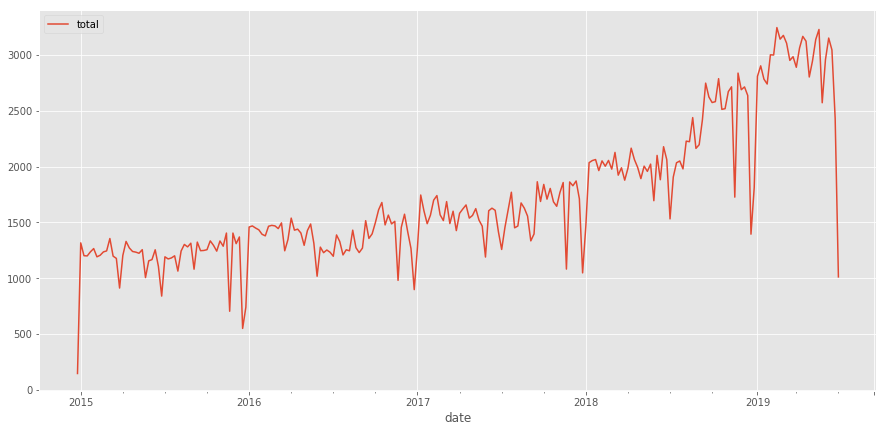

In [50]:
#plot chart of weekly office visits
plt.rcParams['figure.figsize'] = (15.0, 7.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

temp.plot()

Three thing stand out: 1) low number in the beginning/end of chart 2) drop by end of year (probably Christmas break) 3) general decline in visits in the middle of the year.

In [51]:
#remove first and last entry
temp = temp[:-1]
temp = temp[1:]

We observe seasonal trend in data (decrease in summer months) and will use Seaonal Autoregressive Integrated Moving average model (SARIMA).

In [52]:
#import libraries for time series forecasting
import warnings
import itertools
import statsmodels.api as sm

In [53]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [54]:
#split data into train/test; September 2018 chosen as end of train to capture sudden growth in number of visits
train_data = temp['2015-01-01':'2018-09-30']
test_data = temp['2018-10-01':'2019-06-24']

In [55]:
'''#perform grid search for optimal parameters
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue'''

'#perform grid search for optimal parameters\nwarnings.filterwarnings("ignore") # specify to ignore warning messages\n\nAIC = []\nSARIMAX_model = []\nfor param in pdq:\n    for param_seasonal in seasonal_pdq:\n        try:\n            mod = sm.tsa.statespace.SARIMAX(train_data,\n                                            order=param,\n                                            seasonal_order=param_seasonal,\n                                            enforce_stationarity=False,\n                                            enforce_invertibility=False)\n\n            results = mod.fit()\n\n            print(\'SARIMAX{}x{} - AIC:{}\'.format(param, param_seasonal, results.aic), end=\'\r\')\n            AIC.append(results.aic)\n            SARIMAX_model.append([param, param_seasonal])\n        except:\n            continue'

In [56]:
'''print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), 
            SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))'''

"print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), \n            SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))"

In [57]:
#fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=(3,1,0),
                                seasonal_order=(2,1,0,52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

C:\Users\v.butorin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


In [58]:
#set end of prediction period to last week of next month (August 2019)
predictions = results.get_forecast('2019-08-26')
#calculate 95% confidence interval for predictions
predictions_ci = predictions.conf_int()

In [59]:
#predict values from test data based on our model
prediction = predictions.predicted_mean['2018-10-01':'2019-06-24'].values
# flatten nested list
truth = list(itertools.chain.from_iterable(test_data.values))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100

print('The Mean Absolute Percentage Error for the forecast is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast is 6.79%


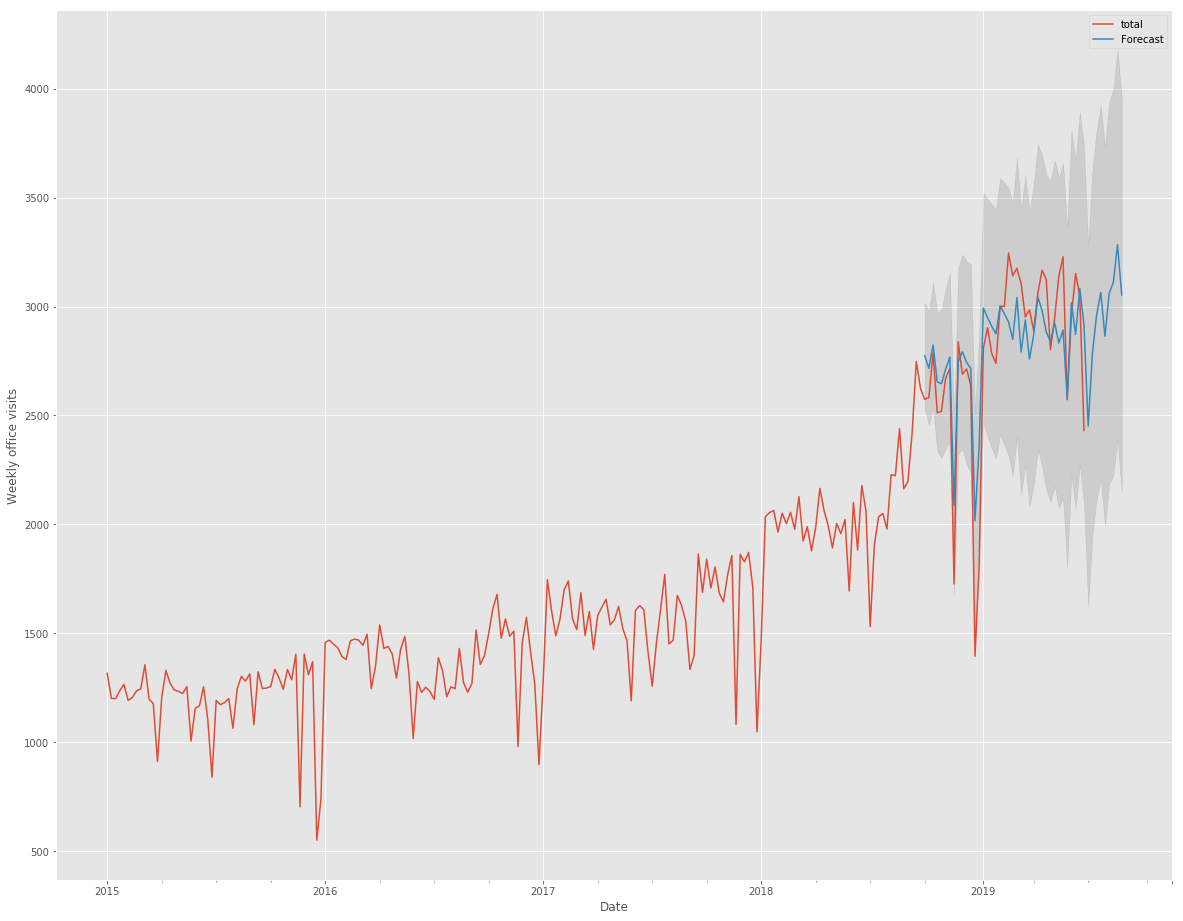

In [60]:
#plot data
ax = temp.plot(figsize=(20, 16))
predictions.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(predictions_ci.index, predictions_ci.iloc[:, 0], predictions_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Weekly office visits')
plt.xlabel('Date')
plt.legend()
plt.show()

In [61]:
#get predicted values for next week/month
predictions.predicted_mean.tail(6)

2019-07-22    3065.757054
2019-07-29    2863.686348
2019-08-05    3060.294379
2019-08-12    3111.569059
2019-08-19    3284.157719
2019-08-26    3053.291340
Freq: W-MON, dtype: float64